In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, classification_report

In [20]:
data=pd.read_csv('../data/lung_cancer_examples (2) (1).csv')
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


### EDA

In [21]:
data.shape

(59, 7)

In [22]:
data.size

413

In [23]:
data.duplicated().sum()

0

In [24]:
data.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [25]:
data.dtypes

Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object

In [26]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


### Outlier handling

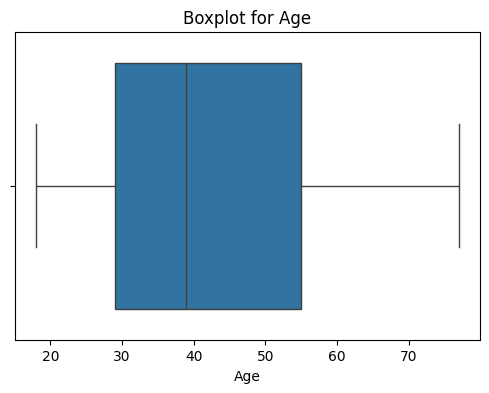

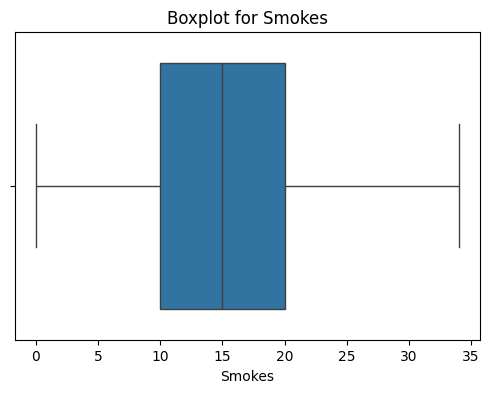

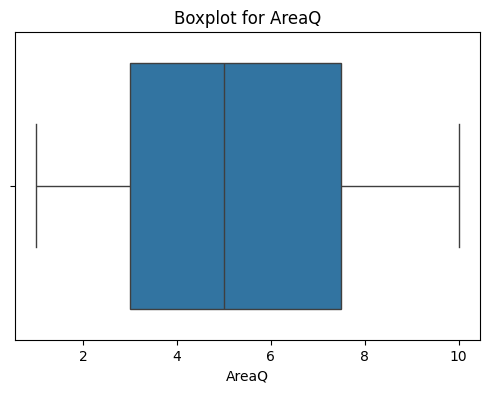

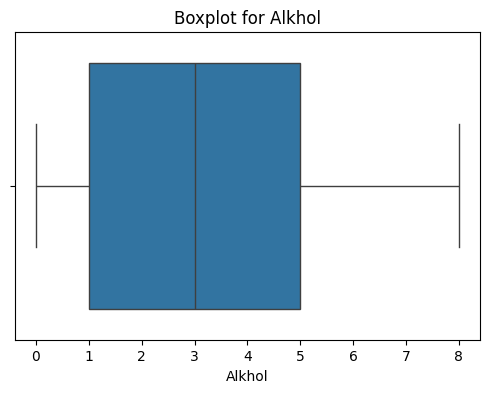

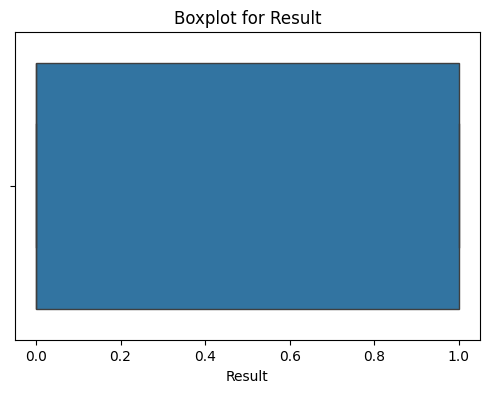

In [27]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting data

In [28]:
X = data[['Age', 'Smokes', 'AreaQ', 'Alkhol']] 
y = data['Result']  

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### PCA

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
X_train

array([[ 1.2102726 , -0.27195079,  0.35098549, -0.46188613],
       [ 0.88622578, -0.15419698,  0.32214213, -0.76935379],
       [-1.63101032, -1.13271078, -0.8688037 , -0.54509613],
       [-2.30634535,  0.8557104 , -0.35192387, -0.09935374],
       [-1.87663783, -0.90368689,  1.48546872,  0.07015667],
       [ 0.76057752, -1.91075732, -0.56000962,  0.97643586],
       [-1.33559783,  0.66678695, -0.50417665, -0.33310376],
       [ 0.5857898 , -1.75948389,  0.52665815,  1.30492111],
       [-0.60165826,  0.22804568, -0.46081537, -0.31833566],
       [-0.77453558, -0.17046328, -0.17495465, -0.08964043],
       [-0.97913559,  0.17777385,  0.20292701,  0.11094415],
       [ 1.07241381, -1.21601464,  1.28458073, -0.08793108],
       [-1.37992117,  0.34638252,  0.73245865, -0.0355847 ],
       [ 0.98046144, -0.07036234,  0.09368379,  0.20189362],
       [-1.9866922 ,  0.11225472,  0.09930945, -0.19846815],
       [-0.76103473,  0.3028598 , -0.05329506, -0.12228677],
       [ 1.18814982,  0.

In [33]:
# Access the explained variance ratio from the PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio for each component
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

# If you want to display the total variance explained by all components:
total_explained_variance = sum(explained_variance_ratio)
print("\nTotal Explained Variance:", total_explained_variance)

Explained Variance Ratio for each component:
[0.52887913 0.25784029 0.14894547 0.06433511]

Total Explained Variance: 0.9999999999999999


### Modeling

In [31]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 91.67%
Logistic Regression Accuracy: 91.67%
SVM Accuracy: 91.67%
KNN Accuracy: 91.67%
Naive Bayes Accuracy: 91.67%
Decision Tree Accuracy: 91.67%
AdaBoost Accuracy: 91.67%
Gradient Boosting Accuracy: 91.67%
XGBoost Accuracy: 91.67%


In [19]:
#END